## Mini-batch Gradient Descent

* if you have a huge dataset it may slowdown you training step, just use the mini-batch gradient descent

Three types of gradient descent:
#### Batch Gradient Descent
* Vecorizations allows Batch GD to process all M relatively quickly. However, if M is very large BGD still be very slowly
* You need to process the entire training set before you the gradient descent can take a one step
* BGD is a special case of mini-batch where the <div class="text-danger">size of the mini-batch = the entire training set</div>

#### Mini-batch Gradient Descent
* The intution her is to let gradient descent start to make some progress even before you finish processing your entire, your training sets.
* Mini-batch t: &nbsp;&nbsp;   $X^{\{t\}}, Y^{\{t\}}$

#### Stochastic Gradient Descent
* SGD is a special case of mini-batch where the <span class="text-danger">size of each mini-batch = one training example</span>
* on average, SGD will go to a good direction, but sometimes it'll head in the wrong direction as well. As stochastic gradient descent won't ever converge, it'll always just kind of oscillate and wander around the region of the minimum.
epoch is a single pass through the entire training set
* big downside is you lost the victorization 

<span style="float:right">&Mfr;&ofr;&hfr;&afr;&mfr;&efr;&dfr; &Efr;&lfr;&dfr;&efr;&sfr;&ofr;&ufr;&kfr;&ifr;</span>

### Mini-batch Gradient Descent Implementation

```python
# for loop over the number of Mini-batch
for e in range(epochs):
    for t in range(T):
        normal_gradient_descent(X[t], Y[t])
    
    
def normal_gradient_descent(X, Y):
    # vectorized implementation
    Y_hat = forward_propagation(X)
    cost = compute_cost(Y_hat)
    dW, db = compute_gradient_using_packprobagation(cost)
    
    W = W - alpha*dW
    b = b - alpha* db
    
    
def compute_cost(Y_hat):
    return (1/number_of_examples_in_the_batch) * sum(loss(each_training_example)) + [regularization term]
    
```

### Guidelines for choosing Mini-batch size
* If you have a small training set just use the batch gradient descent (< 2000)
* because of the way computer memory is layed out and accessed, sometimes your code runs faster if your mini-batch size is a power of 2.
* make sure that the mini-batch fits in your CPU/GPU memory. Which depends in your application and how large is a single example in your training set.
* Try a few different powers of two and then see if you can pick one that makes your gradient descent optimization algorithm as efficient as possible.

## Exponentially Weighted (Moving) Averages - EWMA

* $V_t = \beta V_{t-1} + (1-\beta) \theta_t $
* You can think of $V_t$ as approximately averaging over the last $ \frac{1}{1-\beta}$ days
* As $\beta$ gets larger as the curve gets smoother, beacuse we averaging over more days. However, $V_t$ adapts more slowly, when the x changes.
* Use bias correction to help up your EWMA in cold starts
* bias correction = $ \frac{1}{1-\beta^t} $

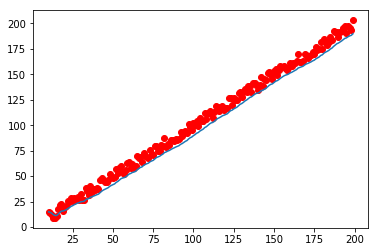

In [117]:
import random
import matplotlib.pyplot as plt
import numpy as np

m = 10
n = 200
beta = 0.90
theta = list()
the_list = list(range(m,n))
for i in the_list:
    r = random.randint(i-5,i+5)
    theta.append(r)
V = 0
ewma = list()
for t in range(len(the_list)):
    warm = 1
    if  0 <= t <= 5000:
        bias_correction = 1-beta**(t+1)
    
    V = (beta*V + (1-beta)*theta[t])
    # print(theta[t], V, V/warming_up)
    ewma.append(V/bias_correction)
    
plt.plot(list(the_list), theta, 'ro')
plt.plot(list(the_list), ewma)
plt.show()

### Gradient Descent with Momentum

* The momentum algorithm is almost always faster than the standard gradient descent algorithm.
* The momentum algorithm is just apply the EWMA to the gradient descent algorithm so it relies on the previous gradient steps.
* The most used value of $\beta$ is $\beta_1 = 0.9$ which means it depends on the last 10 gradient steps.
* In practice, bias correction is ommited since after few iteration algorithm is warmed up.

```python
# for loop over the number of Mini-batch
for e in range(epochs):
    for t in range(T):
        normal_gradient_descent(X[t], Y[t])

VdW = np.zeros_like(dW)
Vdb = np.zeros_like(db)
    
def normal_gradient_descent(X, Y):
    # vectorized implementation
    Y_hat = forward_propagation(X)
    cost = compute_cost(Y_hat)
    dW, db = compute_gradient_using_packprobagation(cost)
    
    VdW = beta * VdW + (1-beta) * dW
    Vdb = beta * Vdb + (1-beta) * db
    
    W = W - alpha * VdW
    b = b - alpha * Vdb
    
    
def compute_cost(Y_hat):
    return (1/number_of_examples_in_the_batch) * sum(loss(each_training_example)) + [regularization term]
    
```

### Root Mean Squared Prop (RMSProp)

- use $\epsilon$ so you don't divide by zero
- first proposed in a coursera course by Hinton

```python
# for loop over the number of Mini-batch
SdW = np.zeros_like(dW)
Sdb = np.zeros_like(db)

for e in range(epochs):
    for t in range(T):
        normal_gradient_descent(X[t], Y[t])

def normal_gradient_descent(X, Y):
    # vectorized implementation
    Y_hat = forward_propagation(X)
    cost = compute_cost(Y_hat)
    dW, db = compute_gradient_using_packprobagation(cost)
    
    SdW = beta_2 * SdW + (1-beta_2) * dW.*dW
    Sdb = beta_2 * Sdb + (1-beta_2) * db.*db
    
    W = W - alpha * dW/np.sqrt(SdW+epsilon)
    b = b - alpha * db/np.sqrt(Sdb+epsilon)
    
    
def compute_cost(Y_hat):
    return (1/number_of_examples_in_the_batch) * sum(loss(each_training_example)) + [regularization term]
    
```

### Adam Optimization Algorithm (AKA ADAptive Moment Estimation)

- Adam algorithm is one of those rare algorithms that has really stood up, and has been shown to work well across a wide range of deep learning architectures.
- In the typical implementation of Adam algorithm you take into consideration the bias correction
- The most used value of $\beta_2$ is $\beta_2 = 0.999$ which means it depends on the last 1000 gradient steps.
- The most used value of $\epsilon$ is $\epsilon = 10^{-8} $

```python
# for loop over the number of Mini-batch
VdW = np.zeros_like(dW)
Vdb = np.zeros_like(db)

SdW = np.zeros_like(dW)
Sdb = np.zeros_like(db)

iteration = 0
for e in range(epochs):
    for t in range(T):
        iteration =+ 1
        normal_gradient_descent(X[t], Y[t], iteration)

def normal_gradient_descent(X, Y, t):
    # vectorized implementation
    Y_hat = forward_propagation(X)
    cost = compute_cost(Y_hat)
    dW, db = compute_gradient_using_packprobagation(cost)
    
    VdW = beta_1*VdW + (1-beta_1) * dw
    Vdb = beta_1*Vdb + (1-beta_1) * db
    
    SdW = beta_2*SdW + (1-beta_2) * dW.*dW
    Sdb = beta_2*Sdb + (1-beta_2) * db.*db
    
    VdW_correction = VdW/(1-beta_1**t)
    Vdb_correction = Vdb/(1-beta_1**t)
    
    SdW_correction = SdW/(1-beta_2**t)
    Sdb_correction = Sdb/(1-beta_2**t)
    
    W = W - alpha * VdW_correction/(np.sqrt(SdW_correction)+epsilon)
    b = b - alpha * Vdb_correction/(np.sqrt(Sdb_correction)+epsilon)
    
    
def compute_cost(Y_hat):
    return (1/number_of_examples_in_the_batch) * sum(loss(each_training_example)) + [regularization term]
    
```

### Learning Rate Decay

- One of the things that might help speed up your learning algorithm, is to slowly reduce your learning rate over time. We call this learning rate decay.

```python
# for loop over the number of Mini-batch
VdW = np.zeros_like(dW)
Vdb = np.zeros_like(db)

SdW = np.zeros_like(dW)
Sdb = np.zeros_like(db)

iteration = 0
__alpha__ = 0.2 # initial value
decay_rate = 1

for e in range(epochs):
    for t in range(T):
        iteration =+ 1
        normal_gradient_descent(X[t], Y[t], iteration, e)

def normal_gradient_descent(X, Y, t, e):
    # vectorized implementation
    Y_hat = forward_propagation(X)
    cost = compute_cost(Y_hat)
    dW, db = compute_gradient_using_packprobagation(cost)
    
    VdW = beta_1*VdW + (1-beta_1) * dw
    Vdb = beta_1*Vdb + (1-beta_1) * db
    
    SdW = beta_2*SdW + (1-beta_2) * dW.*dW
    Sdb = beta_2*Sdb + (1-beta_2) * db.*db
    
    VdW_correction = VdW/(1-beta_1**t)
    Vdb_correction = Vdb/(1-beta_1**t)
    
    SdW_correction = SdW/(1-beta_2**t)
    Sdb_correction = Sdb/(1-beta_2**t)
    
    alpha = __alpha__ * 1/ (1+ decay_rate * e) 
    
    W = W - alpha * VdW_correction/(np.sqrt(SdW_correction)+epsilon)
    b = b - alpha * Vdb_correction/(np.sqrt(Sdb_correction)+epsilon)
    
    
def compute_cost(Y_hat):
    return (1/number_of_examples_in_the_batch) * sum(loss(each_training_example)) + [regularization term]
    
```